<a href="https://colab.research.google.com/github/mollyapsel/SecondYearProject/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
res = pd.read_excel('/content/PS2024_data.xlsx')

In [ ]:
# for each item in res['topic'], insert a newline character after the '/'
res['topic'] = res['topic'].apply(lambda x: x.replace('/', '/\n'))
res['topic'] = res['topic'].apply(lambda x: x.replace('European-American vs.', 'European-American vs.\n'))

In [ ]:
res['topic'] = res['topic'].apply(lambda x: x.replace('old', 'old\n'))

In [ ]:
res['topic']

,topic
0,flowers vs. insects/\npleasant vs. unpleasant
1,instruments vs. weapons/\npleasant vs. unpleas...
2,European-American vs.\n African-American names...
3,European-American vs.\n African-American names...
4,European-American vs.\n African-American names...
5,male vs. female names/\ncareer vs. family
6,math vs. arts/\nmale vs. female terms
7,science vs. arts/\nmale vs. female terms
8,mental vs. physical disease/\ntemporary vs. pe...
9,young vs. old\n people's names/\npleasant vs. ...


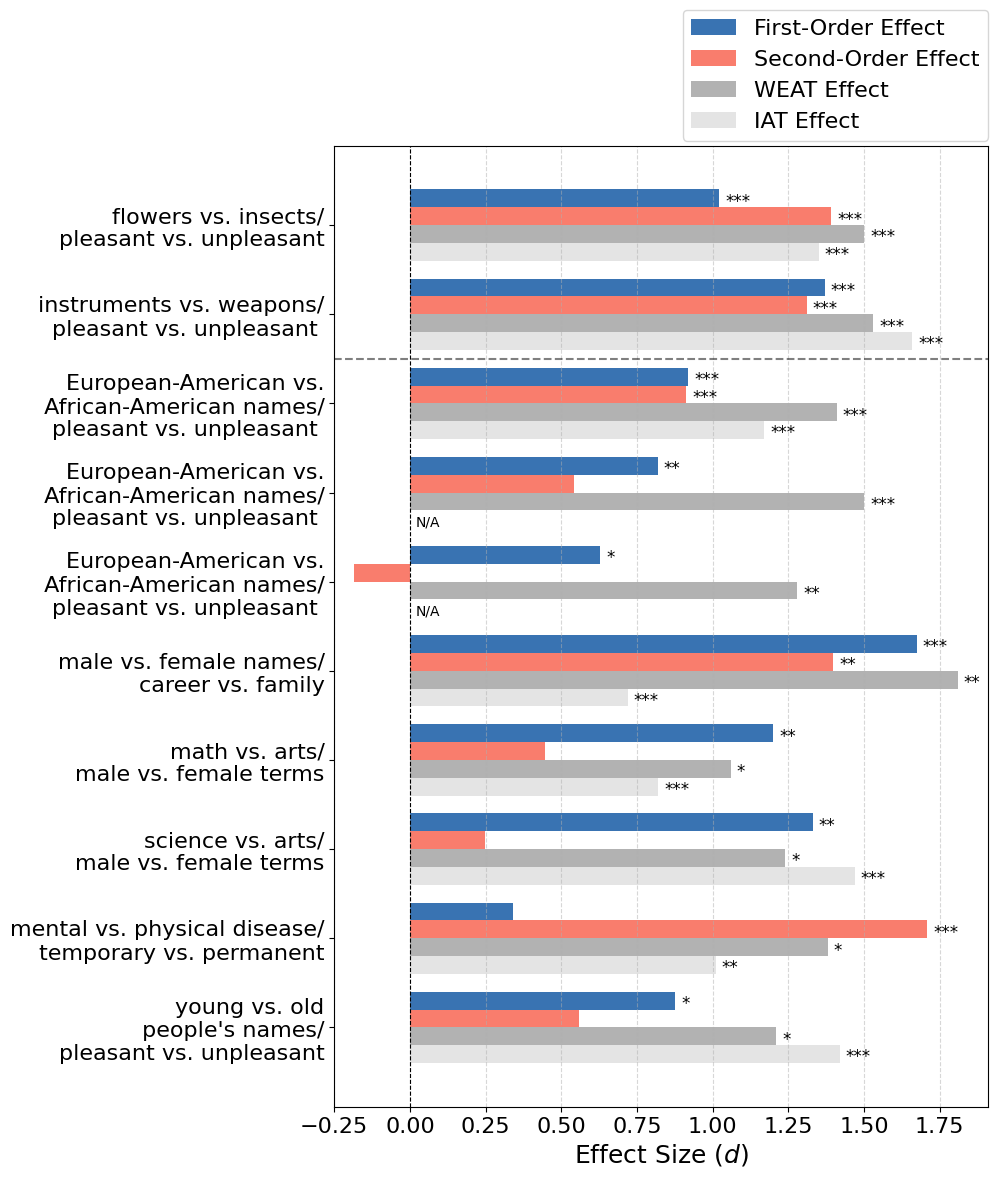

In [ ]:

df = res
df = df.iloc[::-1]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

plt.rcParams.update({'font.size': 14})

# Bar height and positions
bar_height = 0.3
y = np.arange(len(df['topic']))*1.5

# Plot bars with emphasized first- and second-order effects, oriented horizontally
ax.barh(y + 1.5 * bar_height, df['first_order_es'], bar_height, label='First-Order Effect', color='#2364AA', alpha=0.9)
ax.barh(y + 0.5 * bar_height, df['second_order_es'], bar_height, label='Second-Order Effect', color='#F96F5D', alpha=0.9)

# Plot WEAT results
ax.barh(y - 0.5 * bar_height, df['WEAT_d'], bar_height, label='WEAT Effect', color='gray', alpha=0.6)

ax.axhline(y=7.5*1.5, color='black', linestyle='--', alpha=0.5)  # Draw a horizontal line to separate groups

# Plot IAT results, handling "Not applicable" cases
for index, row in enumerate(df.itertuples()):
    if pd.notna(row.IAT_d):
        ax.barh(index*1.5 - 1.5 * bar_height, row.IAT_d, bar_height, label='IAT Effect' if index == 0 else "", color='lightgray', alpha=0.6)
    else:
        ax.text(0.02, index*1.5 - 1.5 * bar_height - 0.05, 'N/A', va='center', ha='left', fontsize=10, color='black')

# Add significance markers for all applicable bars
def significance_marker(p_value):
    if p_value is None:
        return ''  # No marker for "Not applicable"
    elif p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

for index, row in enumerate(df.itertuples()):
    # First-order significance
    marker = significance_marker(row.first_order_p)
    if marker:
        ax.text(row.first_order_es + np.sign(row.first_order_es) * 0.02, index*1.5 + 1.5 * bar_height - 0.02, marker, ha='left', va='center_baseline', fontsize=12, color='black')

    # Second-order significance
    marker = significance_marker(row.second_order_p)
    if marker:
        ax.text(row.second_order_es + np.sign(row.second_order_es) * 0.02, index*1.5 + 0.5 * bar_height - 0.02, marker, ha='left', va='center_baseline', fontsize=12, color='black')

    # WEAT significance
    marker = significance_marker(row.WEAT_p)
    if marker:
        ax.text(row.WEAT_d + np.sign(row.WEAT_d) * 0.02, index*1.5 - 0.5 * bar_height - 0.02, marker, ha='left', va='center_baseline', fontsize=12, color='black')

    # IAT significance
    marker = significance_marker(row.IAT_p)
    if marker:
        ax.text(row.IAT_d + np.sign(row.IAT_d) * 0.02, index*1.5 - 1.5 * bar_height - 0.02, marker, ha='left', va='center_baseline', fontsize=12, color='black')
ax.set_xlim(-0.25)
plt.xticks(fontsize=16)
# Customize the plot
ax.set_yticks(y)
ax.set_yticklabels(df['topic'], fontsize=16)
ax.set_xlabel(r'Effect Size ($\it{d}$)', fontsize = 18)
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at 0 for reference
ax.legend(loc='lower right', bbox_to_anchor=(1, 1.005), borderaxespad=0., fontsize=16)
ax.grid(axis='x', linestyle='--', alpha=0.5)



# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('PS2024_plot4.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()
